# Experiment 1 - Logistic Regression

working on gender classification dataset , it has 7 features and a 
label columns(gender)

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data
df = pd.read_csv("gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df['gender'].replace(to_replace='Male', value=1, inplace=True)
df['gender'].replace(to_replace='Female', value=0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


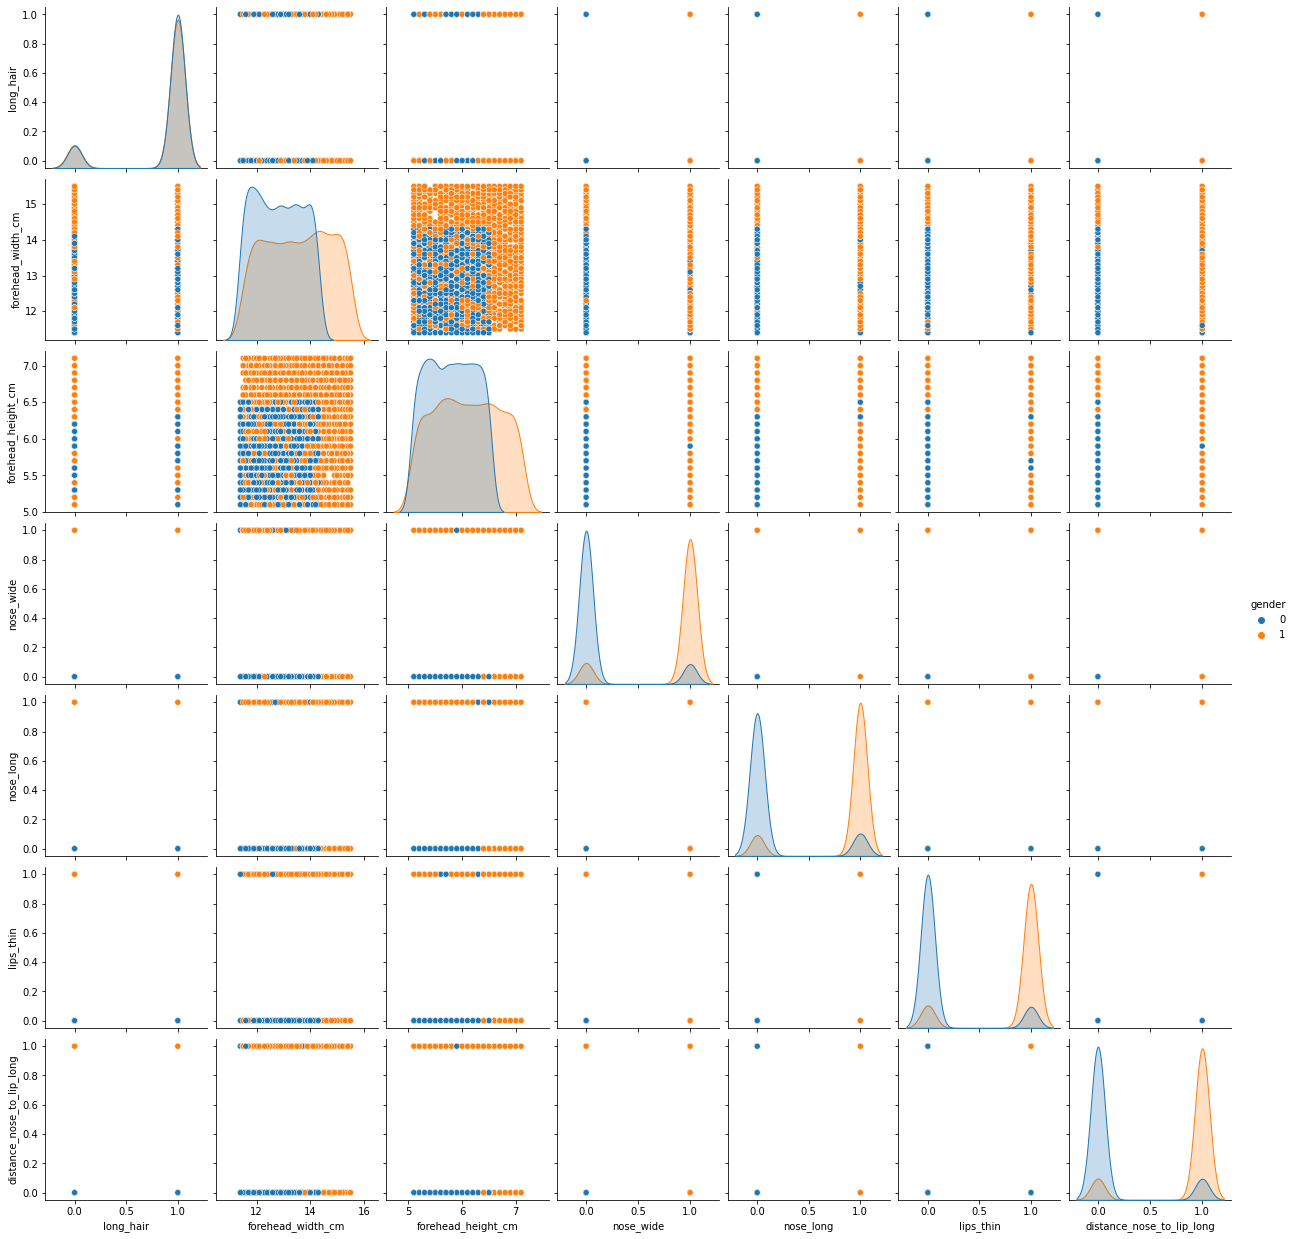

In [ ]:
# ploting a pair plot
sns.pairplot(df,hue="gender")

<AxesSubplot:>

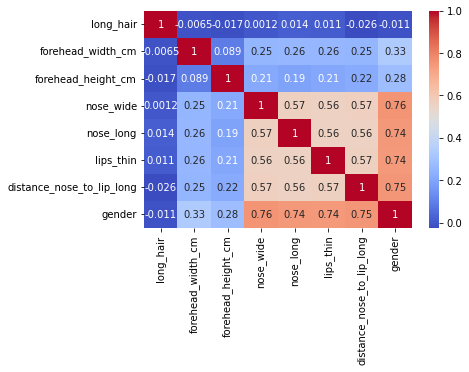

In [ ]:
# plotting a heap map
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

Selecting Features Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent
variable(or feature variable)

<AxesSubplot:xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

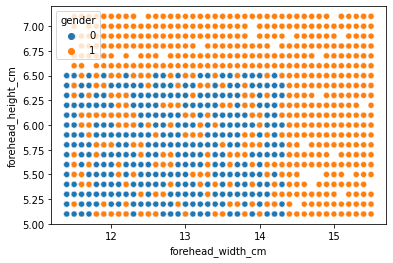

In [ ]:
# plotting a scatter plot between forehead_width_cm and forehead_height_cm 
sns.scatterplot(x="forehead_width_cm",y="forehead_height_cm",hue="gender",data=df)

<AxesSubplot:>

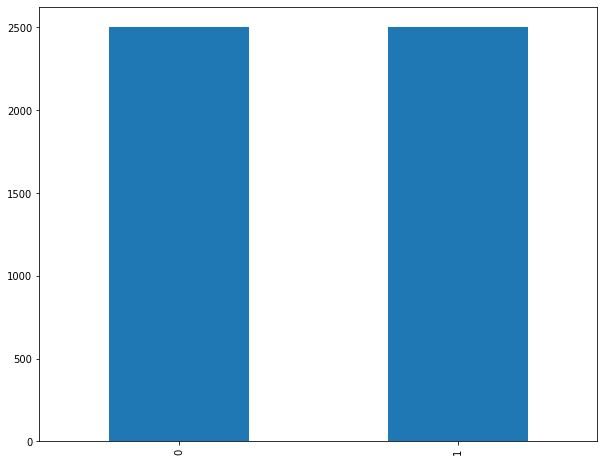

In [ ]:
df.gender.value_counts().plot(kind='bar',figsize = (10,8))

<AxesSubplot:xlabel='gender', ylabel='count'>

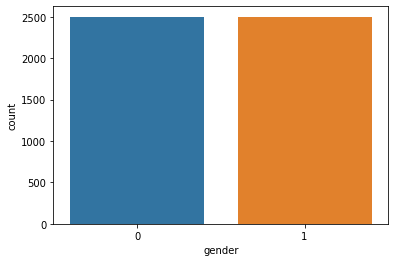

In [ ]:
sns.countplot(x="gender",data=df)

<AxesSubplot:xlabel='gender', ylabel='Density'>

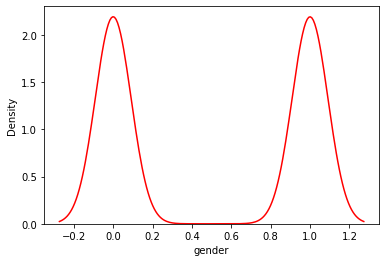

In [ ]:
sns.kdeplot(x='gender' , data = df , color = 'red')

In [ ]:
# split dataset in features and target variable
X = df[["long_hair","forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin",
        "distance_nose_to_lip_long"]] # Features
y = df["gender"] # target variable


In [ ]:
# scaling the feature data
from sklearn import preprocessing

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(X)

Splitting Data To Understand model performance, dividing the dataset into a training set and a test set is as good strategy.

Let's split dataset by using fuction train_test_split(). you need to pass 3 parameters features , target, and test_size. Additionally, you can use random_state to select records randomly

In [ ]:
# split X and y into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.2,
                                                 random_state=42,stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 7)
(1001, 7)
(4000,)
(1001,)


Here, the Dataset is broken into two parts in a ratio 75:25. It means 75% data will be used for model training and rest used for model testing purpose.

Model Development and Prediction First, import the Logistic Regression module and create a Logistic Regression Classifier object using LogisticRegression() function from sklearn.linear_model

Then, fit your model on the training set using the fit() and perform prediction on the test set using and predict() and predict the probablities of each instance using predict_proba()

In [ ]:
# import the LogisticRegression
from sklearn.linear_model import LogisticRegression

# instantiate the model(using the default parameters)
log_reg = LogisticRegression()

# fit the model with data
log_reg.fit(X_train,y_train)


LogisticRegression()

In [ ]:
 y_pred_log = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
_report1 =classification_report( y_test , y_pred_log) 
print(_report1)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       501
           1       0.96      0.96      0.96       500

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



Model Evaluation using the Confusion Matrix A confusion matrix is a table that is used the performance of a classification model.you
can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class wise

In [ ]:
# import the metrics class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_log)
cnf_matrix

array([[483,  18],
       [ 18, 482]], dtype=int64)

C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


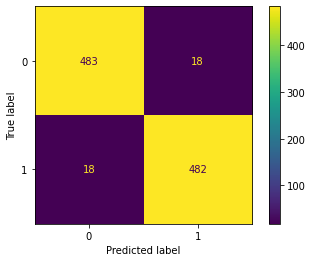

In [ ]:
# plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg , X_test, y_test)

Here, you can see the confusion matrix in the form of array object. The dimension of the matrix is 2*2 because this model is binary classification. you have two classes 0 and 1.

Text(0.5, 257.44, 'Predicted label')

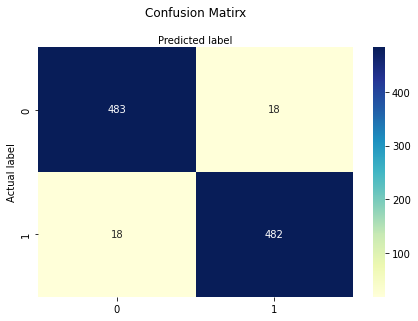

In [ ]:
# plotting the confusing matrix
%matplotlib inline

class_names=["Male","Female"] # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
# create the heap map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matirx", y= 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion Matrix Evaluation Metrics 

Let's elavaluate the model using model evaluation metrics such as accuracy, precision and recall.

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy: ",accuracy_score(y_test,y_pred_log))
print("Precision: ",(cnf_matrix[1][1]/(cnf_matrix[0][1]+cnf_matrix[1][1])))
print("Recall: " , (cnf_matrix[1][1]/(cnf_matrix[1][0]+cnf_matrix[1][1])))

Accuracy:  0.964035964035964
Precision:  0.964
Recall:  0.964


ROC Curve: The receiver operating characteristic(ROC) curve is another common tool used with binary classification. It is very similar to the precision/recall curve, but instead of ploting precision versus recall, the ROC curve plot the true positive rate(another name of recall) against the false positive rate.

C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


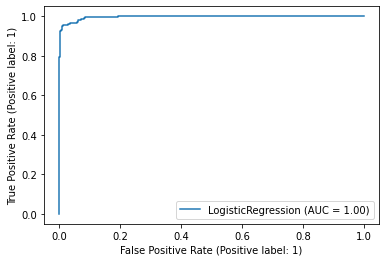

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg ,X_test , y_test)

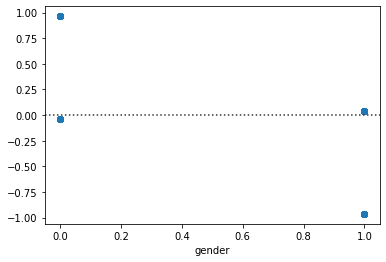

In [ ]:
sns.residplot(x=y_test , y=y_pred_log)
plt.show()

In [ ]:
# auc score
#from sklearn.metrics import roc_auc_score
#y_pred_proba=log_reg.predict_proba(X_test)
#auc = roc_auc_score(y_test,y_pred_proba)
#auc

# Experiment 2 Decision Tree

In [ ]:
# working on the gender_classification_v7 dataset
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the dataset
df1 = pd.read_csv("gender_classification_v7.csv")
df1.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
cols= ["long_hair","forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin",
        "distance_nose_to_lip_long"]

In [ ]:
# split the dataset in feature and target variable
X = df1[["long_hair","forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin",
        "distance_nose_to_lip_long"]] # Features
df1['gender'].replace(to_replace='Male', value=1, inplace=True)
df1['gender'].replace(to_replace='Female', value=0, inplace=True)
y = df1["gender"]

In [ ]:
# scaling the feature data
from sklearn import preprocessing

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(X)

In [ ]:
# split the dataset into training and test set
# split X and y into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.3,
                                                 random_state=1,stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3500, 7)
(1501, 7)
(3500,)
(1501,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create the instance of the Decision Tree classifier
tree_clf = DecisionTreeClassifier()

# Train the Decision Tree Classifier
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = tree_clf.predict(X_test)

In [ ]:
# model Accucary , how often is the classifier is correct
from sklearn.metrics import accuracy_score
print("Accuracy: " , accuracy_score(y_test,y_pred_tree))

Accuracy:  0.9646902065289806


In [ ]:
# classification report
from sklearn.metrics import classification_report
_report3 = classification_report( y_test , y_pred_tree) 
print(_report3)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       751
           1       0.97      0.96      0.96       750

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



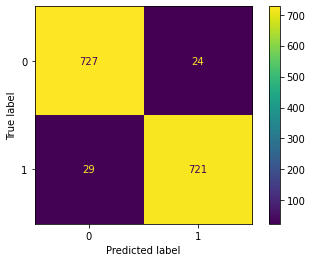

In [ ]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_clf , X_test, y_test)

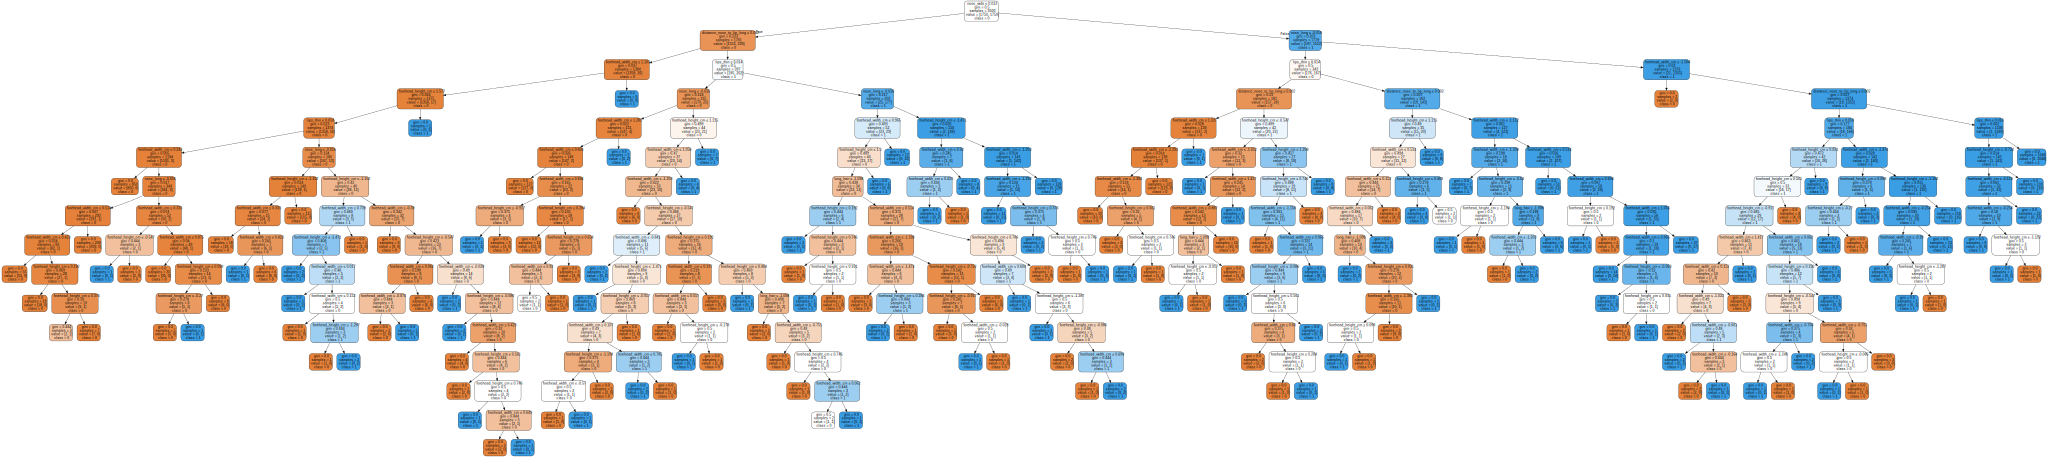

In [ ]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from graphviz import Source

dot_data = StringIO()
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
export_graphviz(tree_clf,
                out_file=os.path.join(IMAGES_PATH, "gender_tree.dot"),
                filled=True,rounded = True,
                special_characters=True,feature_names=cols,class_names=["0","1"])
Source.from_file(os.path.join(IMAGES_PATH, "gender_tree.dot"))

In [ ]:
# creating a new decison with criterion as entropy an max_depth = 3
tree_clf = None 
# create decision tree classifier object
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# train the DTC
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# predict the response for test dataset
y_pred = tree_clf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9626915389740173


Visualizing the decision tree

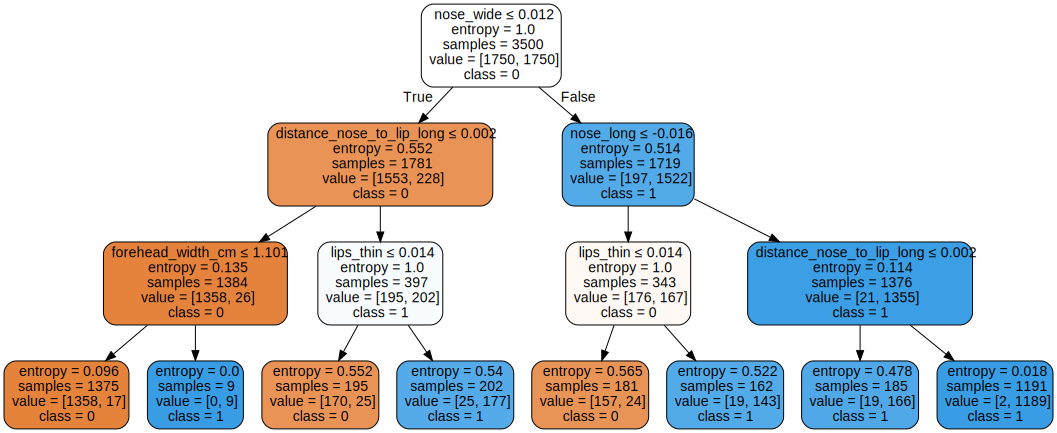

In [ ]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from graphviz import Source

dot_data = StringIO()
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
export_graphviz(tree_clf,
                out_file=os.path.join(IMAGES_PATH, "gender_tree2.dot"),
                filled=True,rounded = True,
                special_characters=True,feature_names=cols,class_names=["0","1"])
Source.from_file(os.path.join(IMAGES_PATH, "gender_tree2.dot"))

# Experiment 3 Support Vector Machine

In [ ]:
# working with gender_classification_v7 dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# load the dataset
df2 = pd.read_csv("gender_classification_v7.csv")
df2.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
# checking the shape of dataset
print("Shape of Dataset : ",df2.shape)
print("Total number of labels: {}".format(df2.gender.unique()))
print("Number of Male: ",df2[df2["gender"]=="Male"].shape[0])
print("Number of Female: ",df2[df2["gender"]=="Female"].shape[0])



Shape of Dataset :  (5001, 8)
Total number of labels: ['Male' 'Female']
Number of Male:  2500
Number of Female:  2501


In [ ]:
# choosing the features and target from the dataset
X = df2[["long_hair","forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin",
        "distance_nose_to_lip_long"]] # Features
print(df2.shape)
print(X.shape)

(5001, 8)
(5001, 7)


In [ ]:
from sklearn.preprocessing import LabelEncoder
y = df2.iloc[:,-1] # selecting the gender column as target
# encode the target y 
# male as 1
# female as 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
# scale the features between -1 and 1 using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
norm_X = scaler.transform(X)

In [ ]:
# spliting the dataset in train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(norm_X,y,test_size=0.3,
                                                 random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 7)
(1501, 7)
(3500,)
(1501,)


In [ ]:
# create a Support Vector Classifier Model
from sklearn.svm import SVC

# svc model on default parameter
svc = SVC()
# fit the training data to the model
svc.fit(X_train,y_train)

SVC()

In [ ]:
# predict the result on test data
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))


Accuracy Score:  0.966688874083944


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       739
           1       0.98      0.96      0.97       762

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



[[722  17]
 [ 33 729]]


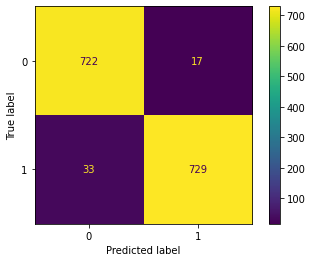

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(svc,X_test,y_test)

In [ ]:
# creating a svc rbf model
svc2 = SVC(kernel="rbf",gamma=0.1,C = 1)
svc2.fit(X_train,y_train)

SVC(C=1, gamma=0.1)

In [ ]:
y_pred=svc2.predict(X_test)
accuracy_score(y_test,y_pred)

0.9700199866755497

# Experiment 4 - KNN 

In [ ]:
# importing the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
dataset.index

RangeIndex(start=0, stop=299, step=1)

In [ ]:
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,299.000000,299.000000,299.000000
mean,35.096990,69331.103679,0.267559
std,10.164451,34577.906432,0.443428
min,18.000000,15000.000000,0.000000
25%,27.000000,43000.000000,0.000000
50%,35.000000,70000.000000,0.000000
75%,41.000000,87500.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              299 non-null    int64
 1   EstimatedSalary  299 non-null    int64
 2   Purchased        299 non-null    int64
dtypes: int64(3)
memory usage: 7.1 KB


In [ ]:
X = dataset[["Age","EstimatedSalary"]].values
y = dataset["Purchased"].values


In [ ]:
# spliting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(224, 2)
(224,)
(75, 2)
(75,)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# creating KNN model from scratch

In [ ]:
from math import sqrt
class KNN():
    def __init__(self,k):
        self.k = k
        print(self.k)
        
    def fit(self,X_train,y_train):
        self.x_train = X_train
        self.y_train = y_train
    def calculate_euclidean(self,sample1,sample2):
        distance = 0.0
        for i in range(len(sample1)):
            distance+=(sample1[i]-sample2[i])**2
        # Euclidean Distance = Sqrt(sum i to N(X1_i - X2_i)^2)
        return sqrt(distance)
    
    def nearest_neighbors(self,test_sample):
        distances=[] # calculate distance from a test sample to every sample in a traning set
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
        distances.sort(key=lambda x:x[1]) # sort in ascending order, based on a distance value
        neighbors = []
        for i in range(self.k): # get first k samples
            neighbors.append(distances[i][0])
        return neighbors
    def predict(self,test_set):
        predictions = []
        for test_sample in test_set:
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels,key=labels.count)
            predictions.append(prediction)
        return predictions

In [ ]:
model = KNN(5)
model.fit(X_train,y_train)

5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric= "minkowski",p = 2)
# the defualt metric is minkowski, and with p = 2 is equivalen to the 
# standard Euclidean metric
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# our model prediction
predictions = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cn = confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[[52  2]
 [ 1 20]]


0.96

In [ ]:
cnn = confusion_matrix(y_test,predictions)
print(cnn)
accuracy_score(y_test,predictions)

[[52  2]
 [ 1 20]]


0.96

Visualising the Test set result

In [ ]:
from matplotlib.colors import ListedColormap
X_set , y_set = scaler.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max() + 10 ,step = 1),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 1))
plt.contourf(X1,X2,classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
    
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()
                    


KeyboardInterrupt



# Experiment 5 KMeans

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
# loding the dataset
driver_data = pd.read_csv("Driver_data.csv",index_col="Driver_ID")
driver_data.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [ ]:
driver_data.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041522,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [ ]:
driver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3423311935 to 3423311533
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance_Feature  4000 non-null   float64
 1   Speeding_Feature  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 93.8 KB


In [ ]:
from sklearn.cluster import KMeans
# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters=4)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(driver_data)

In [ ]:
# centroids
kmeans.cluster_centers_

array([[ 49.98800649,   5.20944484],
       [180.34311782,  10.52011494],
       [ 50.43591549,  32.39671362],
       [177.83509615,  70.28846154]])

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
import numpy as np
unique,counts = np.unique(kmeans.labels_,return_counts=True)

In [ ]:
dict_data = dict(zip(unique,counts))
dict_data

{0: 2774, 1: 696, 2: 426, 3: 104}

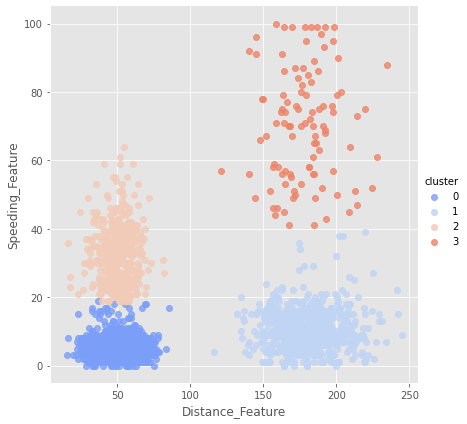

In [ ]:
import seaborn as sns
driver_data["cluster"] = kmeans.labels_
sns.lmplot("Distance_Feature","Speeding_Feature",data=driver_data,hue="cluster",palette="coolwarm",size=6,aspect=1,fit_reg=False)

In [ ]:
# inertia is the sum of the squared error for each cluster
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)
kmeans.inertia_

719601.0859909917

In [ ]:
kmeans.score

<bound method _BaseKMeans.score of KMeans(n_clusters=4)>

In [ ]:
driver_data.cluster.unique()

array([2, 0, 3, 1])

In [ ]:
driver_data

,Distance_Feature,Speeding_Feature,cluster
Driver_ID,,,
3423311935,71.24,28,2
3423313212,52.53,25,2
3423313724,64.54,27,2
3423311373,55.69,22,2
3423310999,54.58,25,2
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1


In [ ]:

data = pd.read_csv("Driver_data.csv",index_col="Driver_ID")
data.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


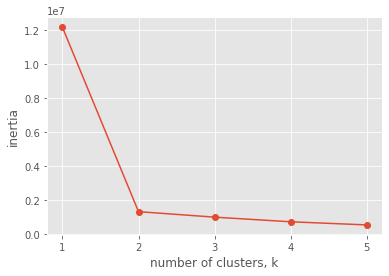

In [ ]:
# finding the best values of n_clusters
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(data)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
inertias

[12184626.129627977,
 1316420.850947719,
 992634.0606702475,
 719601.5383469039,
 534858.3428261087]

# Experiment 6 Naive Bayes Alogrithm

In [ ]:
# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")

About the run_or_walk dataset

the dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

.acceleration_x

acceleration_y

acceleration_z

gyro_x

gyro_y

gyro_z

There is an activity type represented by "activity" column which acts as label and reflects following activities:

"0": walking
"1": running
Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

"0": left wrist
"1": right wrist
Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements.

In [ ]:
df = pd.read_csv("run_or_walk.csv")
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [ ]:
num_walk = len(df[df["activity"]==0].index)
num_run = len(df[df["activity"] ==1].index)
print(f"There are {num_walk} walk activities")
print(f"There are {num_run} run activities")

There are 44223 walk activities
There are 44365 run activities


<AxesSubplot:xlabel='activity', ylabel='count'>

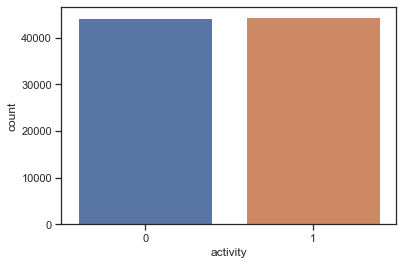

In [ ]:
# ploting a countplot a run and walk activities
sns.countplot("activity",data=df)

In [ ]:
num_left = len(df[df["wrist"]==0].index)
num_right = len(df[df["wrist"] ==1].index)
print(f"There are {num_left} left-handed people")
print(f"There are {num_right} right-handed people")

There are 42330 left-handed people
There are 46258 right-handed people


<AxesSubplot:xlabel='wrist', ylabel='count'>

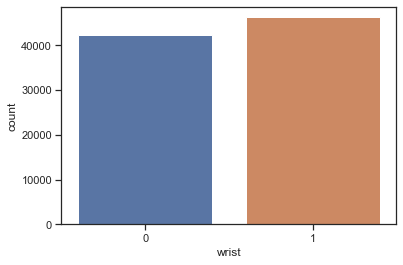

In [ ]:
# ploting a countplot of left and right handed people
sns.countplot("wrist",data=df)

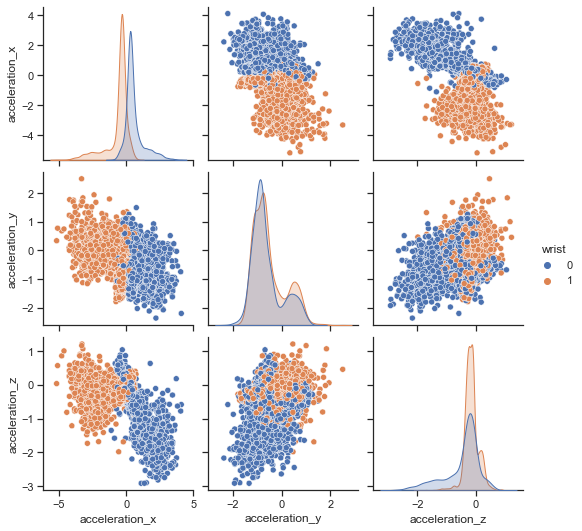

In [ ]:
sns.pairplot(df[["acceleration_x", "acceleration_y", 
                 "acceleration_z", "wrist"]].sample(frac=.1).reset_index(drop=True), hue="wrist")

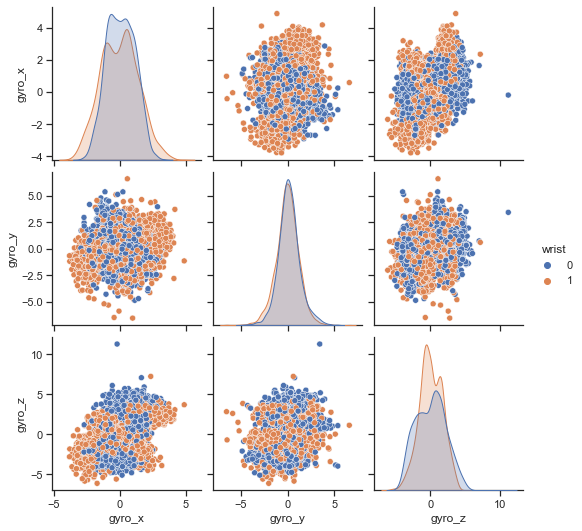

In [ ]:
sns.pairplot(df[["gyro_x", "gyro_y", "gyro_z", "wrist"]].sample(frac=.1).reset_index(drop=True), hue = "wrist")

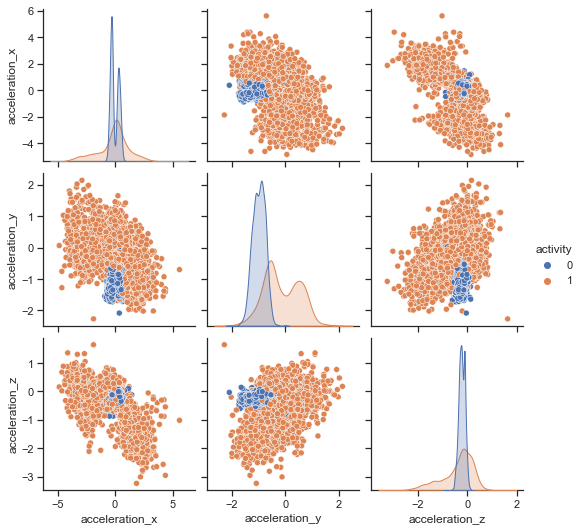

In [ ]:
sns.pairplot(df[["acceleration_x", "acceleration_y", "acceleration_z", "activity"]].sample(frac=.1).reset_index(drop=True), hue="activity")

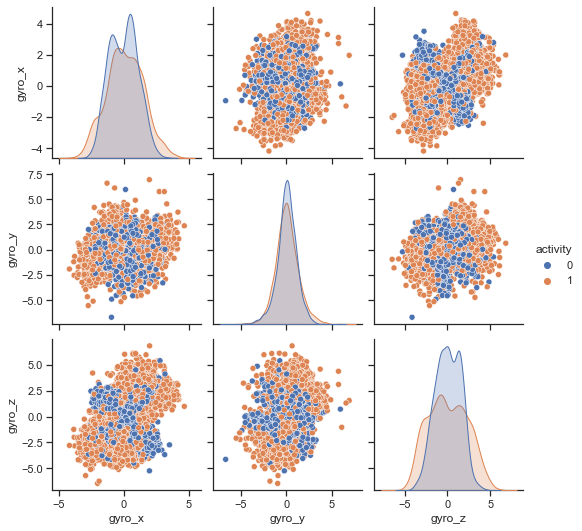

In [ ]:
sns.pairplot(df[["gyro_x", "gyro_y", "gyro_z", "activity"]].sample(frac=.1).reset_index(drop=True), hue="activity")

In [ ]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [ ]:
# splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X,y = df.iloc[:,5:].values,df.iloc[:,4].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                 random_state=21)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test[:10])

(70870, 6)
(17718, 6)
(70870,)
(17718,)
[0 0 0 0 1 0 1 0 0 0]


In [ ]:
# creating a Gaussina Naive bayes model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predict = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.957162207924145

[[8583   90]
 [ 699 8346]]


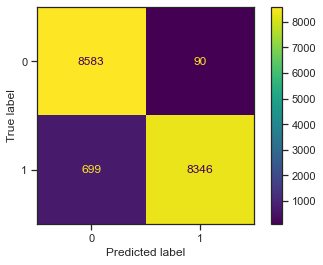

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cnf = confusion_matrix(y_test,y_predict)
print(cnf)
plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ["walk","run"]
print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

        walk       0.92      0.99      0.96      8673
         run       0.99      0.92      0.95      9045

    accuracy                           0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718

